# Лабораторная работа 2 Вариант 2

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Часть 1

#### Определение ω(x)

In [2]:
def omega(x, n):
    result = np.ones(x.size)
    points = np.linspace(a, b, n)
    for point in points:
        result *= (x - point)
    return result

#### Построение ω(х)

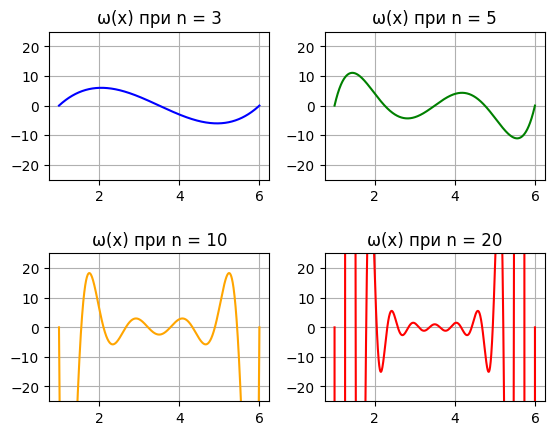

In [3]:
a, b = 1, 6
x = np.linspace(a, b, 1001)
iters = [3, 5, 10, 20]

fig, axes = plt.subplots(2, 2)

fig.subplots_adjust(wspace = 0.25, hspace = 0.5)

colors = ['blue', 'green', 'orange', 'red']

for ax, n, color in zip(axes.reshape(4), iters, colors):
    ax.grid(True)
    ax.set_ylim(-25, 25)
    ax.set_title(f'ω(x) при {n = }')
    ax.plot(x, omega(x, n), color = color)
    
plt.savefig('lab_work_2_1.png')

# Часть 2.1

#### Определение функции Рунге

In [4]:
def runge(x):
    return 1 / (1 + 25 * x * x)

#### Определение интерполяционного члена Лагранжа

In [5]:
def joseph_louis(x, n, func):
    nodes = np.linspace(-1, 1, n)
    result = np.zeros(x.size)
    for node_summ in nodes:
        multipl = np.ones(x.size)
        for node_frac in nodes:
            if node_frac != node_summ:
                multipl *= (x - node_frac)/(node_summ-node_frac)
        result += func(node_summ) * multipl
    return result

#### Построение функции Рунге и интерполяций Лагранжа

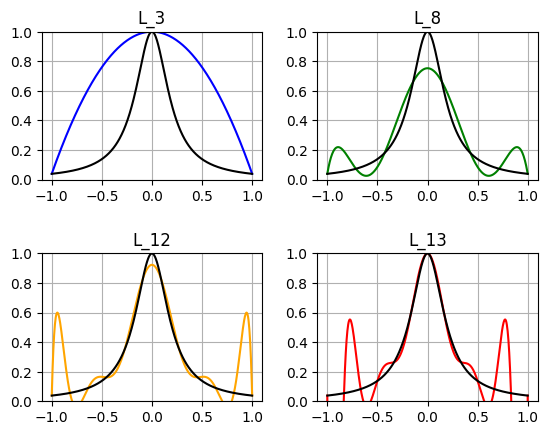

In [6]:
iters = [3, 8 ,12, 13]
x = np.linspace(-1, 1, 500)
fig, axes = plt.subplots(2, 2)

fig.subplots_adjust(wspace = 0.25, hspace = 0.5)

colors = ['blue', 'green', 'orange', 'red']

for ax, n, color in zip(axes.reshape(4), iters, colors):
    ax.grid(True)
    ax.set_ylim(-0, 1)
    ax.set_title(f'L_{n}')
    ax.plot(x, joseph_louis(x, n, runge), color = color)
    ax.plot(x, runge(x), color = 'black')
plt.savefig('lab_work_2_2.png')

# Часть 2.2

#### Вычисление конечных разностей

In [7]:
def delta(values):
    deltas = []
    for i in range(len(values)-1):
        deltas.append(values[i+1]-values[i])
    return deltas

In [8]:
def finite_difference(values):
    differences = []
    val = values
    while len(val) >= 1:
        differences.append(val[0])
        val = delta(val)
    return differences

#### Определение интерполяционного многочлена Ньютона

In [9]:
def isaac(x, n, func):
    nodes = np.linspace(-1, 1, n)
    differences = finite_difference(func(nodes))
    result = np.zeros(x.size)
    q = (x - nodes[0]) / (nodes[1] - nodes[0])
    multiplier = 1
    
    for i, node in enumerate(nodes):
            result += multiplier * differences[i]
            multiplier *= (q - i)/(i + 1)
    return result

#### Построение функции Рунге и интерполяций Ньютона

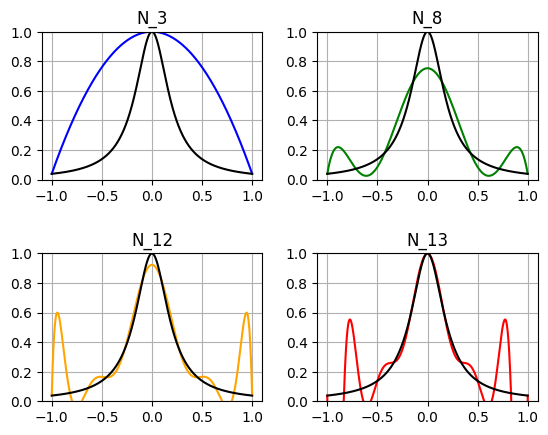

In [10]:
fig, axes = plt.subplots(2, 2)

fig.subplots_adjust(wspace = 0.25, hspace = 0.5)

colors = ['blue', 'green', 'orange', 'red']

for ax, n, color in zip(axes.reshape(4), iters, colors):
    ax.grid(True)
    ax.set_ylim(-0, 1)
    ax.set_title(f'N_{n}')
    ax.plot(x, isaac(x, n, runge), color = color)
    ax.plot(x, runge(x), color = 'black')
plt.savefig('lab_work_2_3.png')